# ΕΡΓΑΣΙΑ 1

* Ομάδα 53
* Μέλη ομάδας:
  * Αθανασίου Ιωάννης, 03117041
  * Καραβαγγέλης Αθανάσιος, 03117022
  * Τσιτσής Αντώνιος, 03117045

## Εγκαταστάσεις πακέτων

In [ ]:
!pip install --upgrade pip #upgrade pip package installer
!pip install scikit-learn --upgrade #upgrade scikit-learn package
!pip install numpy --upgrade #upgrade numpy package
!pip install pandas --upgrade #upgrade pandas package
!pip install --upgrade matplotlib # Κάνουμε update την matplotlib
!pip install optuna

## ΜΕΡΟΣ 1

### Dataset: U02 - Εισαγωγή και επισκόπηση

#### Σύντομη παρουσίαση

* To dataset αφορά το classification δύο πνευματικών καταστάσεων με βάση καταγεγραμμένα ηλεκτροεγκεφαλογραφικά σήματα.
* Οι πνευματικές καταστάσεις με τις οποίες ασχολούμαστε είναι η ηρεμία και η νοητική προετοιμασία μίας κίνησης.

#### Διάβασμα dataset

In [ ]:
import pandas as pd

data = pd.read_csv("plrx.txt", sep="\t ", header=None)
print(data)

          0         1         2         3   ...        9         10        11   12
0   -0.17936 -0.207000 -0.209710 -0.097260  ... -0.032886  0.003383 -0.334250  1.0
1   -0.14659 -0.164940  0.249870 -0.073985  ...  0.050759 -0.017511  0.066959  1.0
2   -0.13131  0.518160  0.432810  0.397890  ... -0.040303  0.088057  0.631200  2.0
3    0.64940  0.418780  0.148350  0.333490  ... -0.367230  0.364680  0.571720  1.0
4   -0.40628  0.115030  0.073336  0.070066  ...  0.153750 -0.126950  0.184570  1.0
..       ...       ...       ...       ...  ...       ...       ...       ...  ...
177 -0.55005  0.276290 -0.273240  0.113190  ... -0.014462  0.002273 -0.100480  2.0
178 -0.78399  0.254600 -0.700990 -0.299170  ...  0.020018 -0.020915  0.663940  1.0
179  0.29877 -0.179620  0.032859 -0.899010  ... -0.411130  0.246830 -0.389160  2.0
180 -0.37812 -0.522870  0.215410 -0.243590  ... -0.039117  0.007591  0.476030  1.0
181  0.37913 -0.046562 -0.123360 -0.063958  ... -0.242290  0.173690  0.490630  2.0

[18

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until


#### Επεξεργασία dataset

* Παρατηρώ ότι η στήλη 12 παίρνει ως τιμές μόνο το 1.0 και το 2.0, και επομένως η στήλη αυτή θα περιέχει τα labels.
* Θα διαχωρίσω τα features από τα labels.
* Θα μετατρέψω τα labels ώστε να παίρνουν τιμές 0 και 1 ως εξής: 1.0->0, 2.0->1.

In [ ]:
import numpy as np
labels = data.iloc[:, [12]].values
def normalize(label):
    assert label==2. or label==1.
    if label==1.:
        return 0
    if label==2.:
        return 1
vectorized_norm = np.vectorize(normalize)
labels = np.array([vectorized_norm(row) for row in labels])

features = data.iloc[:, :12].values

print("labels shape:", labels.shape)
print("features shape:", features.shape)

labels shape: (182, 1)
features shape: (182, 12)


#### Παρατηρήσεις

* Κάθε example έχει 12 features και 1 label.
* Έχουμε 182 examples.
* Δεν υπάρχει αρίθμηση γραμμών.
* Δεν υπάρχουν επικεφαλίδες.
* Δεν υπάρχουν απουσιάζουσες τιμές.
* Δεν υπάρχουν μη διατεταγμένα χαρακτηριστικά.

In [ ]:
count = np.bincount(labels.flatten())
print(f"Class-0: {count[0]} examples, {round(100*count[0]/sum(count), 3)}%")
print(f"Class-1: {count[1]} examples, {round(100*count[1]/sum(count), 3)}%")

Class-0: 130 examples, 71.429%
Class-1: 52 examples, 28.571%


* Μετράω ποσοστά 71.429% και 28.571% και επομένως καταλήγω στο συμπέρασμα ότι το dataset δεν είναι ισορροπημένο.

### Προετοιμασία

##### Διαχωρίζω σε train και test set με αναλογίες 70-30

In [ ]:
from sklearn.model_selection import train_test_split

train, test, train_labels, test_labels = train_test_split(features, labels, test_size=0.3)
train_pipeline, test_pipeline, train_labels_pipeline, test_labels_pipeline = train_test_split(features, labels, test_size=0.3)
train_grid, test_grid, train_labels_grid, test_labels_grid = train_test_split(features, labels, test_size=0.3)
print(train.shape, train_labels.shape)
print(test.shape, test_labels.shape)

(127, 12) (127, 1)
(55, 12) (55, 1)


* Δεν υπάρχουν απουσιάζουσες τιμές, ούτε κατηγορικά/μη διατεταγμένα χαρακτηριστικά.

### Ταξινόμηση

#### Επιδόσεις out-of-the-box

In [ ]:
from sklearn.dummy import DummyClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, f1_score
import matplotlib.pyplot as plt


dummy = DummyClassifier()
gnb = GaussianNB()
knn = KNeighborsClassifier()
log_reg = LogisticRegression()

models = [
    {
        "name": "dummy",
        "model": dummy,
    },
    {
        "name": "bayes",
        "model": gnb,
    },
    {
        "name": "Knn",
        "model": knn,
    },
    {
        "name": "log_regr",
        "model": log_reg,
    },  
]

def compute_simple_scores(models, train, train_labels):
    accuracy = dict()
    f1 = dict()
    for m in models:
        name, model = m.values()
        # print(model)
        model.fit(train, train_labels.ravel())
        preds = model.predict(test)
        accuracy[name] = round(accuracy_score(test_labels, preds), 3)
        f1[name] = round(f1_score(test_labels, preds), 3)
    return accuracy, f1

out_of_the_box_accuracy, out_of_the_box_f1 = compute_simple_scores(models, train, train_labels)
print('accuracy:', out_of_the_box_accuracy)
print('f1-score:', out_of_the_box_f1)

accuracy: {'dummy': 0.727, 'bayes': 0.6, 'Knn': 0.636, 'log_regr': 0.709}
f1-score: {'dummy': 0.0, 'bayes': 0.0, 'Knn': 0.091, 'log_regr': 0.0}


##### Πίνακας σύγκρισης

In [ ]:
def print_scores_table(models, accuracy, f1, train_times=None, test_times=None):
    if train_times:
        print("Model      \t| accuracy\t| f1-score\t| train_time(ms)\t| test_time (ms)")
    else:
        print("Model      \t| accuracy\t| f1-score")
    print("-------------------------------------------")
    for m in models:
        name, model = m.values()
        acc, f1_score = accuracy[name], f1[name]
        if train_times:
            time = test_times[name]
            print(f"{name}      \t| {acc}      \t| {f1_score}\t\t| {train_times[name]}\t\t| {test_times[name]}")
        else:
            print(f"{name}      \t| {acc}      \t| {f1_score}")
            

print_scores_table(models, out_of_the_box_accuracy, out_of_the_box_f1)

Model      	| accuracy	| f1-score
-------------------------------------------
dummy      	| 0.727      	| 0.0
bayes      	| 0.6      	| 0.0
Knn      	| 0.636      	| 0.091
log_regr      	| 0.709      	| 0.0


<table>
<thead>
  <td>Model</td>
  <td>Accuracy-score</td>
  <td>f1-score</td>
</thead>
<tbody>
<tr>
  <td>Dummy</td>
  <td>0.727</td>
  <td>0.0</td>
</tr>
<tr>
  <td>Bayes</td>
  <td>0.6</td>
  <td>0.0</td>
</tr>
<tr>
  <td>Knn</td>
  <td>0.636</td>
  <td>0.091</td>
</tr>
<tr>
  <td>Log.regression</td>
  <td>0.709</td>
  <td>0.0</td>
</tr>
</tbody>
</table>

##### Bar plots σύγκρισης

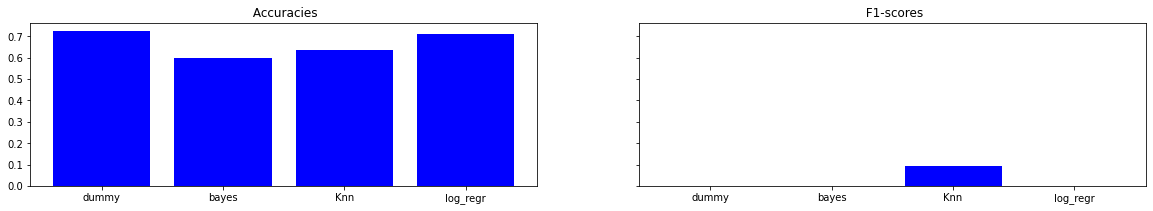

In [ ]:
def plot_scores(accuracy, f1, fig_index=1, title_prefix="", color="blue"):
    fig, axs = plt.subplots(1, 2, figsize=(20, 3), sharey=True)
    axs[0].bar(accuracy.keys(), accuracy.values(), color=color)
    axs[0].set_title(f"{title_prefix} Accuracies")

    axs[1].bar(f1.keys(), f1.values(), color=color)
    axs[1].set_title(f"{title_prefix} F1-scores")


plot_scores(out_of_the_box_accuracy, out_of_the_box_f1)

##### Συμπεράσματα

* Παρατηρώ ότι όλα τα μοντέλα έχουν, στο testing set, σχετικά ικανοποιητικά accuracie-scores.
* Ωστόσο, στην μετρική του f1-score, παρατηρούνται αντίθετα αποτελέσματα, αφού όλα τα μοντέλα έχουν μικρά score.    

#### Βελτιστοποίηση με προεπεξεργασία και χρήση pipelines

##### Για αρχή, κατασκευάζουμε ένα pipeline και χρησιμοποιούμε τις default τιμές των υπερπαραμέτρων των μετασχηματιστών και των εκτιμητών

* Έχω ένα μοντέλο για κάθε ταξινομητή, αφού δεν δοκιμάζω διαφορετικές τιμές για τις υπερπαραμέτρους
* Επομένως, θα εκπαιδεύσω και πάλι κάθε μοντέλο σε όλο το training set και θα υπολογίσω την επίδοσή του στο testing set

In [ ]:
from imblearn.pipeline import Pipeline
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report

dummy = DummyClassifier()
gnb = GaussianNB()
knn = KNeighborsClassifier()
log_reg = LogisticRegression()

models = [
    {
        "name": "dummy",
        "model": dummy,
    },
    {
        "name": "bayes",
        "model": gnb,
    },
    {
        "name": "Knn",
        "model": knn,
    },
    {
        "name": "log_regr",
        "model": log_reg,
    },  
]

def compute_pipeline_scores(models):
    pipeline_accuracy = dict()
    pipeline_f1 = dict()
    
    for modell in models:
        name, model = modell.values()
        selector = VarianceThreshold()
        scaler = StandardScaler()
        ros = RandomOverSampler()
        pca = PCA()
        pipe = Pipeline(
            steps=[
                ('selector', selector),
                ('scaler', scaler),
                ('sampler', ros),
                ('pca', pca),
                (name, model),
            ]
        )
        
        #pipeline_accuracy[name] = round(cross_val_score(pipe, train_pipeline, train_labels_pipeline.ravel(), cv=10, scoring='accuracy').mean(), 3)
        #pipeline_f1[name] = round(cross_val_score(pipe, train_pipeline, train_labels_pipeline.ravel(), cv=10, scoring='f1').mean(), 3)

        pipe.fit(train_pipeline, train_labels_pipeline)
        preds = pipe.predict(test_pipeline)
        pipeline_accuracy[name] = round(accuracy_score(test_labels, preds), 3)
        pipeline_f1[name] = round(f1_score(test_labels, preds), 3)

    return pipeline_accuracy, pipeline_f1

pipe_accuracy, pipe_f1 = compute_pipeline_scores(models)
print(pipe_accuracy)
print(pipe_f1)

{'dummy': 0.727, 'bayes': 0.473, 'Knn': 0.618, 'log_regr': 0.473}
{'dummy': 0.0, 'bayes': 0.171, 'Knn': 0.364, 'log_regr': 0.216}


##### Εκτυπώνω τα αποτελέσματα σε πίνακα:

In [ ]:
print_scores_table(models, pipe_accuracy, pipe_f1)

Model      	| accuracy	| f1-score
-------------------------------------------
dummy      	| 0.727      	| 0.0
bayes      	| 0.473      	| 0.171
Knn      	| 0.618      	| 0.364
log_regr      	| 0.473      	| 0.216


<table>
<thead>
  <td>Model</td>
  <td>Accuracy-score</td>
  <td>f1-score</td>
</thead>
<tbody>
<tr>
  <td>Dummy</td>
  <td>0.727</td>
  <td>0.0</td>
</tr>
<tr>
  <td>Bayes</td>
  <td>0.473</td>
  <td>0.171</td>
</tr>
<tr>
  <td>Knn</td>
  <td>0.618</td>
  <td>0.364</td>
</tr>
<tr>
  <td>Log.regression</td>
  <td>0.473</td>
  <td>0.216</td>
</tr>
</tbody>
</table>

##### Κατασκευάζω και τα bar plots:

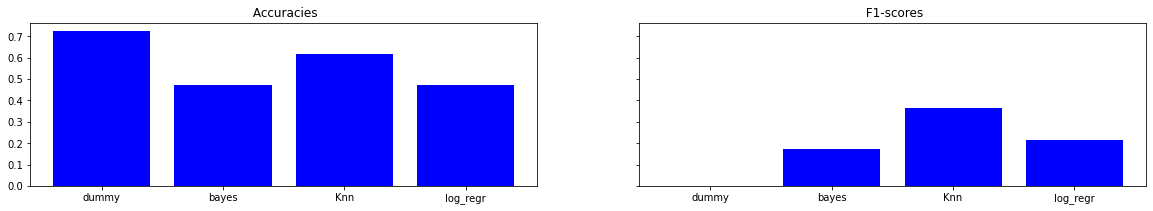

In [ ]:
plot_scores(pipe_accuracy, pipe_f1)

* Παρατηρώ ότι, σε σύγκριση με τις out-of-the-box επιδόσεις χωρίς την χρήση pipelines:
    * Μόνο το f1-score του dummy παραμένει μηδενικό.
    * Όλα τα υπόλοιπα f1-scores έχουν αυξηθεί σημαντικά.
    * Τα accuracy-scores παρουσιάζουν κάποιες μειώσεις, αλλά συνεχίζουν να κινούνται στο ίδιο εύρος με το προηγούμενο πείραμα.

#### Βελιστοποίηση με χρήση pipelines και gridsearchCV

##### Ορίζω τους ταξινομητές

* Τώρα, θα δοκιμάσω, με την μέθοδο του grid search, διάφορες τιμές των υπερπαραμέτρων του κάθε ταξινομητή.
* Θα κατασκευάσω, δηλαδή, πολλά μοντέλα για κάθε ταξινομητή, και θα βρω το βέλτιστο του κάθε ταξινομητή, ώστε να ελέξγω την επίδοσή του στο testing set.
* Όσον αφορά την προεπεξεργασία των δεδομένων, για να αποφασίσω τις τιμές στις οποίες θα κινείται το threshold του selector, μετράω τις εξής διακυμάνσεις:

In [ ]:
train_variance = train_grid.var(axis=0)
print(train_variance)
print(np.max(train_variance))

[0.22825624 0.15829012 0.11811736 0.16605055 0.2178019  0.17289506
 0.21141897 0.13344763 0.23172825 0.17260755 0.11340507 0.10812781]
0.23172825088761193


* Θα δοκιμάσω άρα λίγες τιμές στο περίπου εύρος 0.10-0.20.
* Ορίζω τους εκτιμητές των μοντέλων που θα εκπαιδεύσω:

In [ ]:
from sklearn.model_selection import GridSearchCV

def generate_estimators():
    dummy = DummyClassifier()
    gnb = GaussianNB()
    knn = KNeighborsClassifier()
    log_reg = LogisticRegression()

    models = [
        {
            "name": "dummy",
            "model": dummy,
            "hyper_param_name": "dummy__strategy",
            "hyper_param_values": ["stratified", "most_frequent", "prior", "uniform"],
        },
        {
            "name": "bayes",
            "model": gnb,
            "hyper_param_name": None,
            "hyper_param_values": None,
        },
        {
            "name": "knn",
            "model": knn,
            "hyper_param_name": "knn__n_neighbors",
            "hyper_param_values": [1, 2, 5, 8, 11, 14],
        },
        {
            "name": "log_regr",
            "model": log_reg,
            "hyper_param_name": None,
            "hyper_param_values": None,
        },  
    ]
    return models

##### Ορίζω τις συναρτήσεις εκπαίδευσής τους και αξιολόγησής τους στο test set

* Για κάθε ταξινομητή, εντοπίζω το καλύτερο μοντέλο του, με αναζήτηση πλέγματος με διασταυρούμενη επικύρωση.

In [ ]:
from sklearn.metrics import accuracy_score, f1_score
import time

def pick_best_models(useSelector=True, useScaler=True, useSampler=True, usePca=True):
    '''
    * for each estimator type,
      * generate a pipe
      * use grid search to decide the best hyper-params
    * return a list of dictionaries describing the best models, as they were decided by grid search
    '''
    models = generate_estimators()
    grid_accuracy = dict()
    grid_f1 = dict()
    best_estimators = []
    for modell in models:
        name, model, hyper_params_name, hyper_params_values = modell.values()
        
        steps = []
        hyperparams = dict()

        if useSelector:
            selector = VarianceThreshold()
            steps.append(('selector', selector))
            hyperparams['selector__threshold'] = [0.10, 0.14, 0.18]
        if useScaler:
            scaler = StandardScaler()
            steps.append(('scaler', scaler))
        if useSampler:
            ros = RandomOverSampler()
            steps.append(('ros', ros))
        if usePca:
            pca = PCA()
            steps.append(('pca', pca))
            hyperparams['pca__n_components'] = [i for i in range(1, 3)]
        
        steps.append((name, model))

        if hyper_params_name:
            hyperparams[hyper_params_name] = hyper_params_values

        pipe = Pipeline(
            steps = steps,
            memory='tmp',
        )
                
        estimator = GridSearchCV(
            pipe,
            hyperparams,
            cv=10,
            scoring="f1_macro"
        )
                
        estimator.fit(train_grid, train_labels_grid.ravel())
        best_estimators.append({
            'name': name,
            'model': estimator.best_estimator_,
            'params': estimator.best_params_,
        })
    return best_estimators


def reTrainEstimator(name, params, useSelector=True, useScaler=True, useSampler=True, usePca=True):
    '''
    * take as input the name and the params of a model
    * this model is one of best, as decided by grid search
    * generate a new NON-FITTED model with these params
    * re-train it on the while dataset
    '''
    steps = []

    # re-define the tranformers
    if useSelector:
        threshold = params["selector__threshold"] if params.get("selector__threshold") else 0
        selector = VarianceThreshold(threshold=threshold)
        steps.append(('selector', selector))

    if useScaler:
        steps.append(('scaler', StandardScaler()))

    if useSampler:
        steps.append(('sampler', RandomOverSampler()))

    if usePca:
        n_components = params["pca__n_components"] if params.get("pca__n_components") else None
        pca = PCA(n_components)
        steps.append(('pca', pca))

    # re-define the estimator
    if name=="dummy":
        strategy = params["dummy_strategy"] if params.get("dummy_strategy") else "prior"
        model = DummyClassifier(strategy=strategy)

    elif name=="bayes":
        model = GaussianNB()
    
    elif name=="knn":
        k = params["knn__n_neighbors"] if params.get("knn__n_neighbours") else 5
        model = KNeighborsClassifier(n_neighbors=k)

    elif name=="log_regr":
        model = LogisticRegression()
        name = "log_regr"
  
    steps.append((name, model))

    # generate and fit the pipe on the whole dataset
    pipe = Pipeline(steps=steps)

    tic = time.time()
    pipe.fit(train_grid, train_labels_grid.ravel())
    tac = time.time()
    train_time = round((tac-tic) * 1000, 3)

    return pipe, train_time

def compute_best_models_test_scores(best_estimator, useSelector=True, useScaler=True, useSampler=True, usePca=True):
    '''
    * receives a list with the best model of each classifier type
    * for each of these models:
        * uses `reTrainEstimator` to build a new model with the same parameters
        * fits it on the while training set, tests it on the test set
        * returns some dicts with accuracy, f1, train time, test time, predictions
    '''
    grid_accuracy = dict()
    grid_f1 = dict()
    grid_train_time = dict()
    grid_test_time = dict()
    grid_preds = dict()
    for est in best_estimator:
        name, model, params = est.values()
        trained_model, train_time = reTrainEstimator(name, params, useSelector=useSelector, useScaler=useScaler, useSampler=useSampler, usePca=usePca)
        tic = time.time()
        preds = trained_model.predict(test_grid)
        tac = time.time()
        grid_preds[name] = preds
        grid_train_time[name] = train_time
        grid_test_time[name] = round((tac-tic) * 1000, 3)
        grid_accuracy[name] = round(accuracy_score(test_labels_grid, preds), 3)
        grid_f1[name] = round(f1_score(test_labels_grid, preds), 3)
    return grid_accuracy, grid_f1, grid_train_time, grid_test_time, grid_preds

def show_best_models_scores(best_estimators, useSelector=True, useScaler=True, useSampler=True, usePca=True, fig_index=50, title_prefix="", color="blue", logging=False, max_acc=None, min_acc=None, max_avg=None):
    '''
    * uses `compute_best_models_test_scores` to compute the test scores
    * returns:
        * a dict with the predictions
        * three objects for the estimators with
            * the max accuracy till now
            * the lowest accuracy till now
            * the max accuracy-f1 average till now
    '''
    grid_accuracy, grid_f1, grid_train_time, grid_test_time, grid_preds = compute_best_models_test_scores(
        best_estimators,
        useSelector=useSelector,
        useScaler=useScaler,
        useSampler=useSampler,
        usePca=usePca
    )
    # print(grid_accuracy)
    # print(grid_f1)
    if logging:
        print("Best models scores on the testing set:")
        best_estimators_trimmed = [{'name': est['name'], 'model': est['model']} for est in best_estimators]
        print_scores_table(best_estimators_trimmed, grid_accuracy, grid_f1, grid_train_time, grid_test_time)
    #print('---------------------------')
                   
    print(f"{'selector-' if useSelector else ''}{'scaler-' if useScaler else ''}{'sampler-' if useSampler else ''}{'pca-' if usePca else ''}:")
    print('\ttrain times:', grid_train_time)
    print('\ttest times:', grid_test_time)
    plot_scores(grid_accuracy, grid_f1, fig_index=fig_index, title_prefix=title_prefix, color=color)
    
    #print("I am show_best_models_scores, testing accuracy, with curr:", max_acc)
    
    local_max_name, local_max = None, None
    local_min_name, local_min = None, None
    local_max_avg_name, local_max_avg = None, None
    if max_acc is not None:
        for name in grid_accuracy:
            if name=='dummy':
                continue
            if grid_accuracy[name] > max_acc:
                local_max_acc = grid_accuracy[name]
                local_max_name = name
            if grid_accuracy[name] < min_acc:
                local_min_acc = grid_accuracy[name]
                local_min_name = name
            if (grid_accuracy[name]+grid_f1[name])/2 > max_avg:
                local_max_avg = (grid_accuracy[name]+grid_f1[name])/2
                local_max_avg_name = name
        if local_max_name:
            local_max = {
                'name': f"{'selector-' if useSelector else ''}{'scaler-' if useScaler else ''}{'sampler-' if useSampler else ''}{'pca-' if usePca else ''}{local_max_name}",
                'accuracy': grid_accuracy[local_max_name],
                'f1': grid_f1[local_max_name],
                'predictions': grid_preds[local_max_name]
            }
        if local_min_name:
            local_min = {
                'name': f"{'selector-' if useSelector else ''}{'scaler-' if useScaler else ''}{'sampler-' if useSampler else ''}{'pca-' if usePca else ''}{local_min_name}",
                'accuracy': grid_accuracy[local_min_name],
                'f1': grid_f1[local_min_name],
                'predictions': grid_preds[local_min_name]  
            }
        if local_max_avg_name:
            local_max_avg = {
                'name': f"{'selector-' if useSelector else ''}{'scaler-' if useScaler else ''}{'sampler-' if useSampler else ''}{'pca-' if usePca else ''}{local_max_avg_name}",
                'accuracy': grid_accuracy[local_max_avg_name],
                'f1': grid_f1[local_max_avg_name],
                'predictions': grid_preds[local_max_avg_name],
                'avg': (grid_accuracy[local_max_avg_name]+grid_f1[local_max_avg_name])/2,
            }
    return grid_preds, (local_max or None), (local_min or None), (local_max_avg or None)


##### Δοκιμές πολλών αρχιτεκτονικών

* Για κάθε αρχιτεκτονική:
    * Χτίζω τα διάφορα μοντέλα
    * για το καλύτερο μοντέλο για κάθε ταξινομητή
        * το εκπαιδεύω στο σύνολο του train set
        * σχεδιάζω γραφική με τις επιδόσεις του στο test set
        * καταγράφω τους χρόνους του στο train και test set
* Από όλα τα παραγόμενα μοντέλα, κρατάω τα βασικά στοιχεία των εξής:
    * του μοντέλου που έχει το μέγιστο μέχρι τώρα accuracy (ζητείται από την εκφώνηση)
    * του μοντέλου που έχει το ελάχιστο μέχρι τώρα accuracy (ζητείται από την εκφώνηση)
    * του μοντέλου που έχει τον μέγιστο μέσο όρο accuracy και f1-score (θα το προτείνω στο τέλος)

* Κάθε δυάδα (γραμμή) διαγραμμάτων που ακολουθεί, αφορά και μία διαφορετική αρχιτεκτονική

Generating all models... please wait...
selector-scaler-sampler-pca-:
	train times: {'dummy': 2.338, 'bayes': 2.739, 'knn': 2.659, 'log_regr': 4.291}
	test times: {'dummy': 0.423, 'bayes': 0.542, 'knn': 3.186, 'log_regr': 0.489}
selector-scaler-sampler-:
	train times: {'dummy': 1.876, 'bayes': 2.208, 'knn': 2.123, 'log_regr': 7.298}
	test times: {'dummy': 0.314, 'bayes': 0.471, 'knn': 3.434, 'log_regr': 0.428}
selector-scaler-pca-:
	train times: {'dummy': 1.665, 'bayes': 1.973, 'knn': 2.029, 'log_regr': 3.876}
	test times: {'dummy': 0.421, 'bayes': 0.621, 'knn': 3.268, 'log_regr': 0.525}
selector-scaler-:
	train times: {'dummy': 1.254, 'bayes': 1.586, 'knn': 1.69, 'log_regr': 6.693}
	test times: {'dummy': 0.293, 'bayes': 0.475, 'knn': 3.232, 'log_regr': 0.455}
selector-sampler-pca-:
	train times: {'dummy': 2.014, 'bayes': 2.156, 'knn': 2.073, 'log_regr': 4.474}
	test times: {'dummy': 0.335, 'bayes': 0.459, 'knn': 3.196, 'log_regr': 0.394}
selector-sampler-:
	train times: {'dummy': 1.33

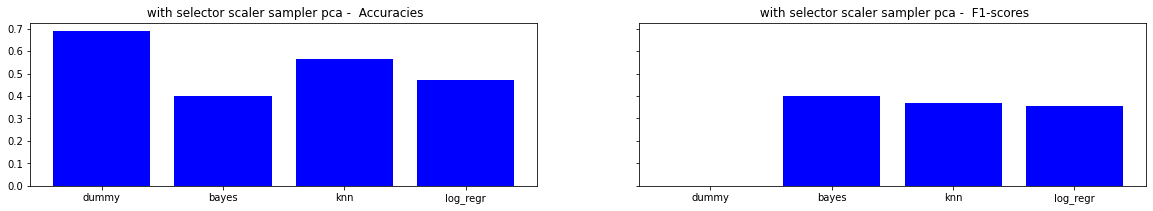

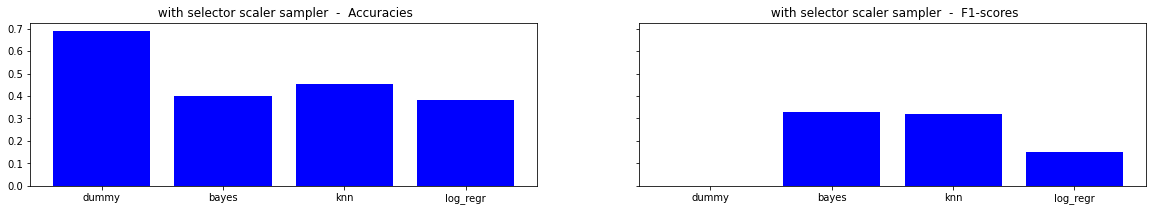

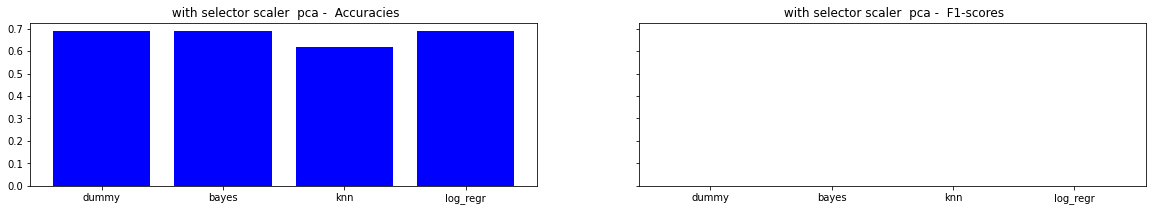

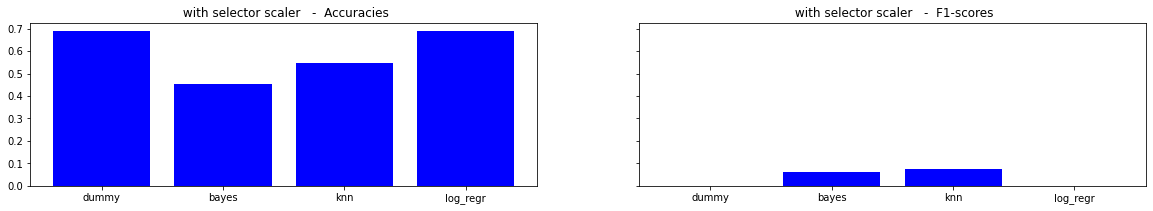

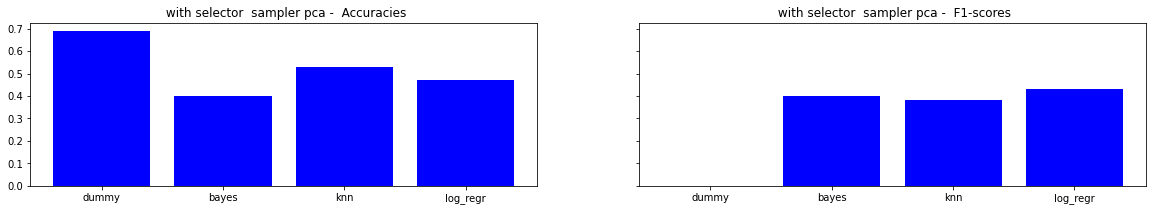

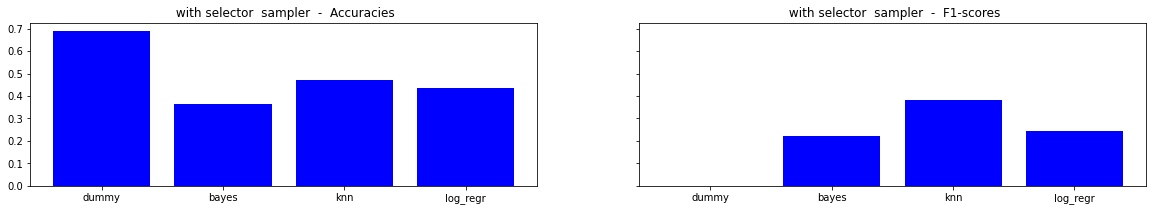

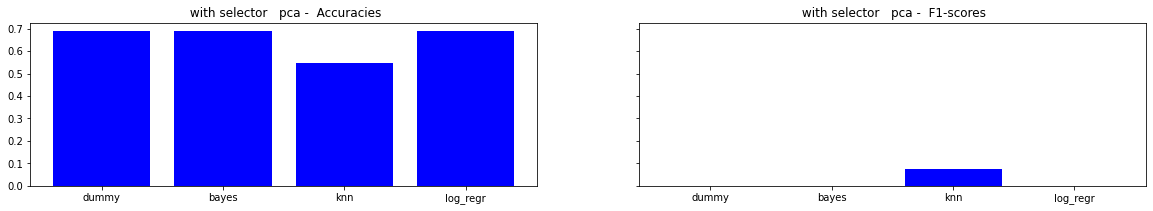

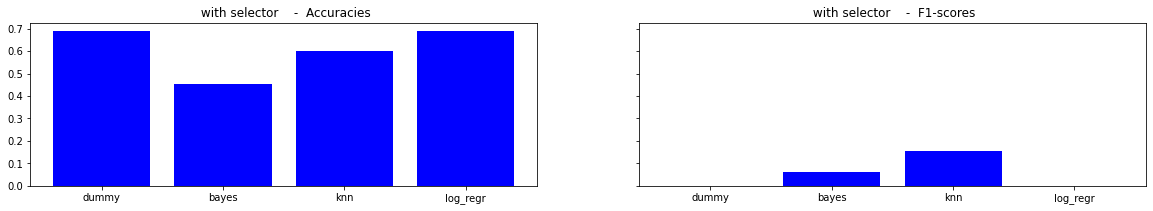

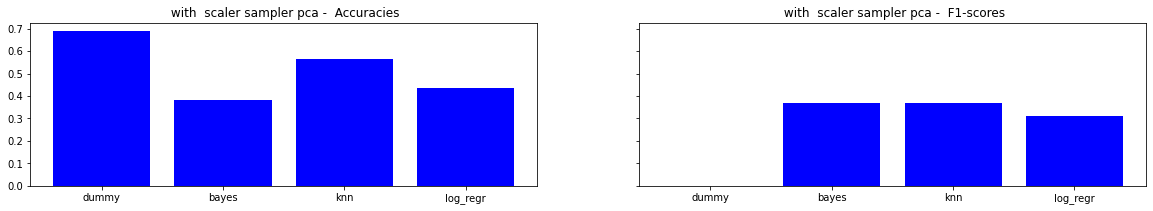

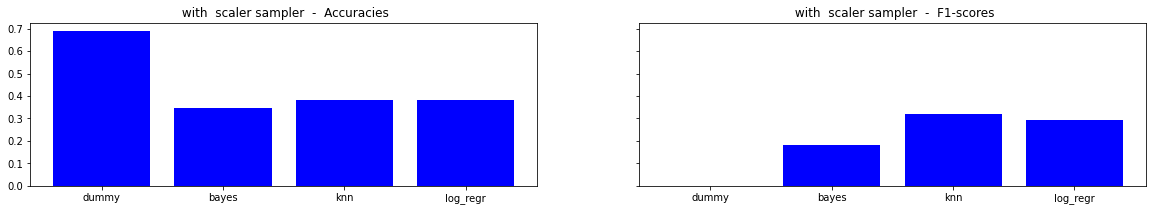

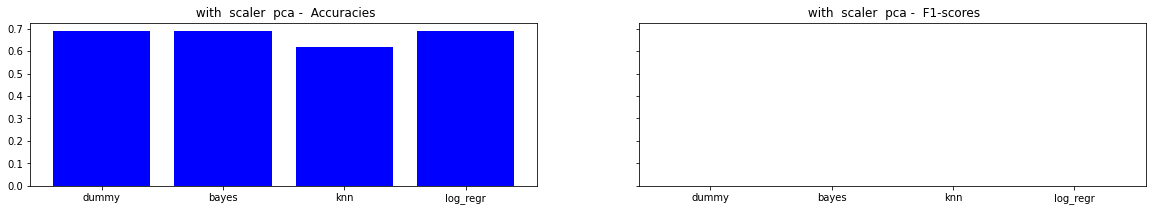

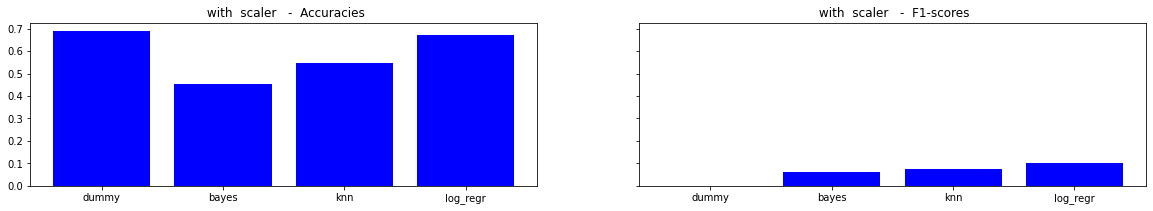

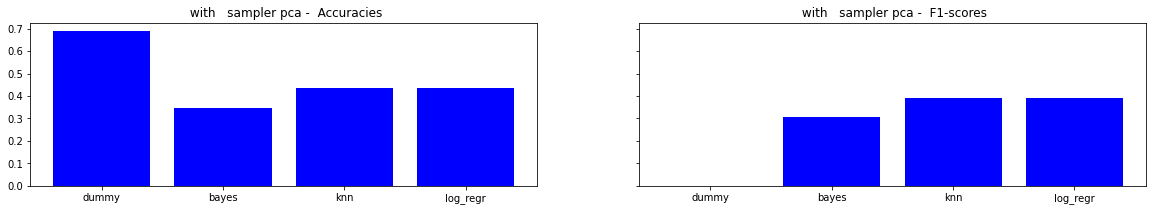

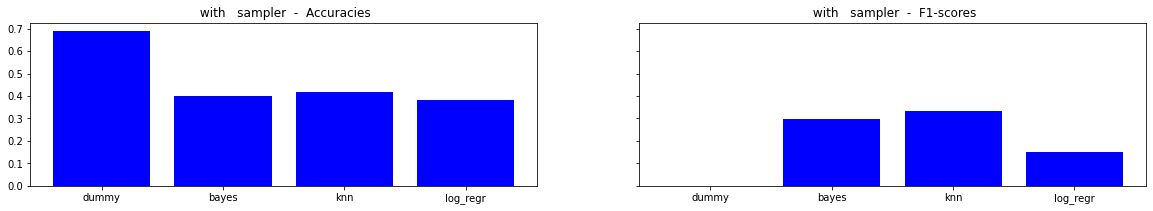

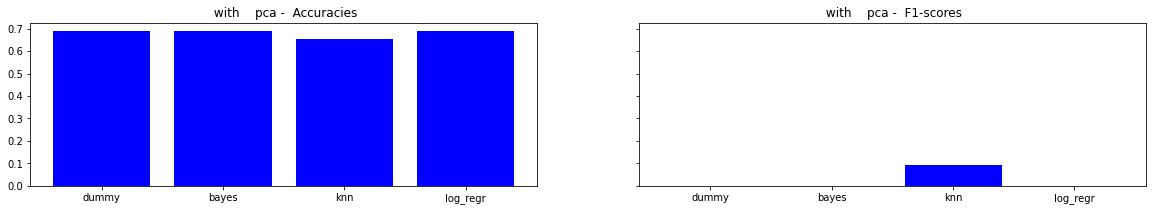

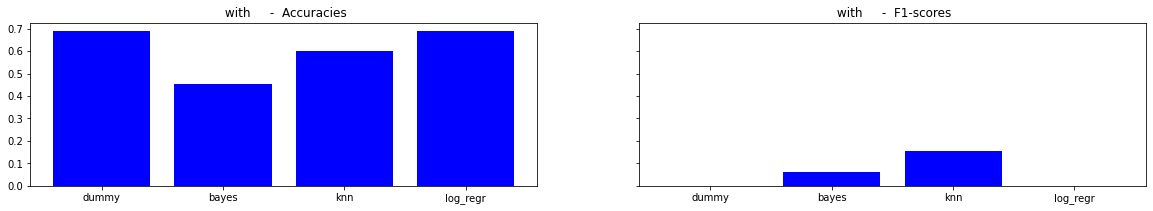

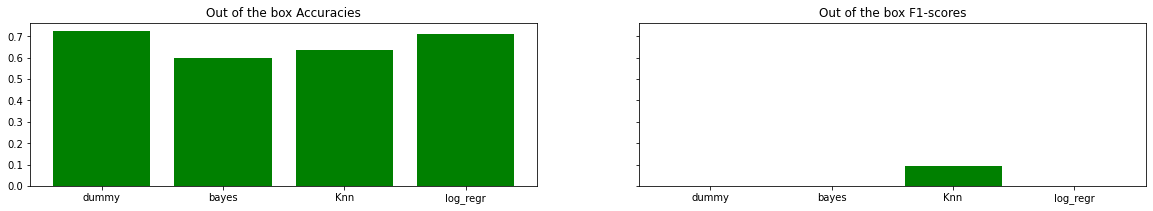

In [ ]:
max_accuracy = {
    'name': None,
    'predictions': None,
    'accuracy': 0.0,
}
min_accuracy = {
    'name': None,
    'predictions': None,
    'accuracy': 1.0,
}

max_average = {
    'name': None,
    'predictions': None,
    'avg': 0.0,
}

c=0
print("Generating all models... please wait...")
# for each architecture
for useSelector in [True, False]:
    for useScaler in [True, False]:
        for useSampler in [True, False]:
            for usePca in [True, False]:
                # find the 4 best estimators
                best_estimators = pick_best_models(useSelector=useSelector, useScaler=useScaler, useSampler=useSampler, usePca=usePca)
                title_prefix = f" with {'selector' if useSelector else ''} {'scaler' if useScaler else ''} {'sampler' if useSampler else ''} {'pca' if usePca else ''} - "
                # plot their accuracy and f1 bar charts
                predictions,  max_accuracy_object, min_accuracy_object, max_average_object = show_best_models_scores(
                    best_estimators,
                    useSelector=useSelector,
                    useScaler=useScaler,
                    useSampler=useSampler,
                    usePca=usePca,
                    fig_index=100+c,
                    title_prefix=title_prefix,
                    max_acc=max_accuracy['accuracy'],
                    min_acc=min_accuracy['accuracy'],
                    max_avg=max_average['avg']
                )
                # update the max/min-accuracy and max-average estimators
                if max_accuracy_object is not None:
                    max_accuracy = max_accuracy_object
                if min_accuracy_object is not None:
                    min_accuracy = min_accuracy_object
                if max_average_object is not None:
                    max_average = max_average_object
                c += 1
# print the results
print()
print(f"Max accuracy: {max_accuracy['accuracy']}, by {max_accuracy['name']}")
print(f"Lowest accuracy: {min_accuracy['accuracy']}, by {min_accuracy['name']}")
print(f"Max average (accuracy, f1): {round(max_average['avg'], 3)}, by {max_average['name']}")

# plot the bar chart for the outof-the-box models, to compare
plot_scores(out_of_the_box_accuracy, out_of_the_box_f1, fig_index=100+c, title_prefix="Out of the box", color="green")

##### Καλύτερος ταξινομητής ως προς την ορθότητα

* Το accuracy και το f1-score του μοντέλου αυτού είναι κρατημένα στο object `max_accuracy`
* Εκτυπώνω εκ νέου τις συγκριτικές γραφικές παραστάσεις, και τον ζητούμενο πίνακα markdown για το μοντέλο:

accuracy: 0.691
f1-score: 0.0


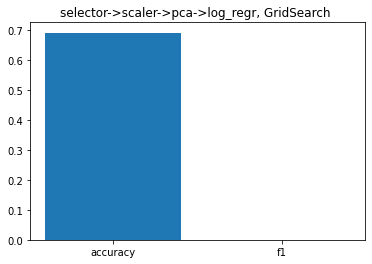

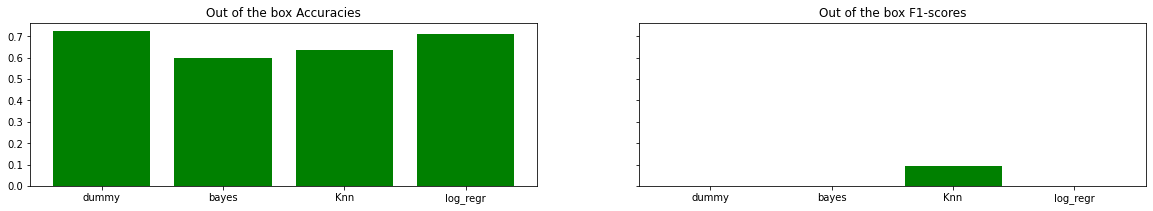

In [ ]:
plt.title(f"{max_accuracy['name'].replace('-', '->')}, GridSearch ")
plt.bar(['accuracy', 'f1'], [max_accuracy['accuracy'], max_accuracy['f1']])
print("accuracy:", max_accuracy['accuracy'])
print("f1-score:", max_accuracy['f1'])
plot_scores(out_of_the_box_accuracy, out_of_the_box_f1, fig_index=102+c, title_prefix="Out of the box", color="green")

* Ο πίνακας markdown:
<table>
<thead>
  <td>Model</td>
  <td>Grid-Search accuracy-score</td>
  <td>Grid-Search f1-score</td>
  <td>Out of the box accuracy-score</td>
  <td>Out of the box f1-score</td>
  <td>Grid-Search test-time (ms)</td>
  <td>Grid-Search train-time (ms)</td>
</thead>
    <tbody>
        <tr>
            <td>Log.regression</td>
            <td>0.6191</td>
            <td>0.0</td>
            <td>0.709</td>
            <td>0.0</td>
            <td>5.786</td>
            <td>0.73</td>
        </tr>
    </tbody>
</table>

###### Παρατηρήσεις

* Στο μοντέλο με το βέλτιστο accuracy:
    * Παρατηρώ  ότι το accuracy-score δεν ξεπερνάει την out-of-the-box επίδοση.
    * Το f1-score παραμένει μηδενικό.   

###### Πίνακας σύγχυσης

selector-scaler-pca-log_regr:


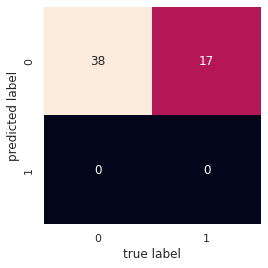

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns; sns.set()

pred = max_accuracy['predictions']
print(f"{max_accuracy['name']}:")
mat = confusion_matrix(test_labels_grid , pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

##### Χειρότερος ταξινομητής ως προς την ορθότητα:

* Το accuracy και το f1-score του μοντέλου αυτού είναι κρατημένα στο object `min_accuracy`
* Εκτυπώνω εκ νέου τις συγκριτικές γραφικές παραστάσεις, και τον ζητούμενο πίνακα markdown για το μοντέλο:

accuracy: 0.345
f1-score: 0.182


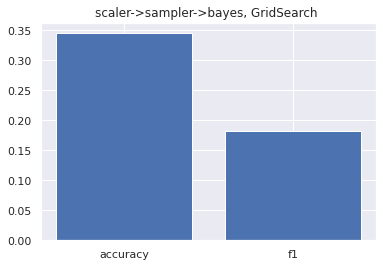

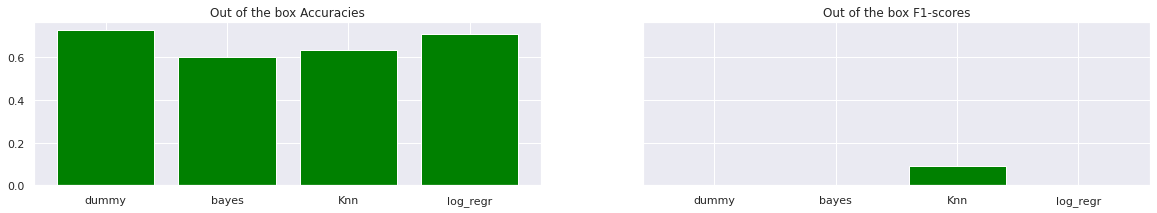

In [ ]:
plt.title(f"{min_accuracy['name'].replace('-', '->')}, GridSearch ")
plt.bar(['accuracy', 'f1'], [min_accuracy['accuracy'], min_accuracy['f1']])
print("accuracy:", min_accuracy['accuracy'])
print("f1-score:", min_accuracy['f1'])
plot_scores(out_of_the_box_accuracy, out_of_the_box_f1, fig_index=102+c, title_prefix="Out of the box", color="green")

###### Παρατηρήσεις

* Στο μοντέλο με το ελάχιστο accuracy:
    * Παρατηρώ  ότι το accuracy-score είναι αρκετά μικρότερο από την out-of-the-box επίδοση.
    * Το f1-score ωστόσο έχει αυξηθεί σημαντικά.   

###### Πίνακας σύγχυσης

scaler-sampler-bayes:


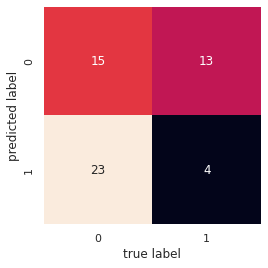

In [ ]:
pred = min_accuracy['predictions']
print(f"{min_accuracy['name']}:")
mat = confusion_matrix(test_labels_grid , pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

##### Ταξινομητής που προτείνω

* Προτείνω τον ταξινομητή που έχει τον μεγαλύτερο μέσο όρο των δύο scores
* Το accuracy και το f1-score του μοντέλου αυτού είναι κρατημένα στο object `max_average`

accuracy: 0.564
f1-score: 0.368


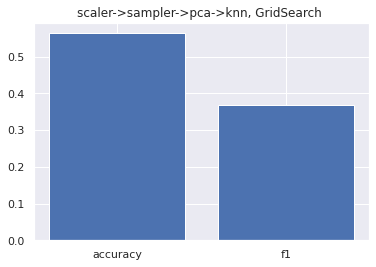

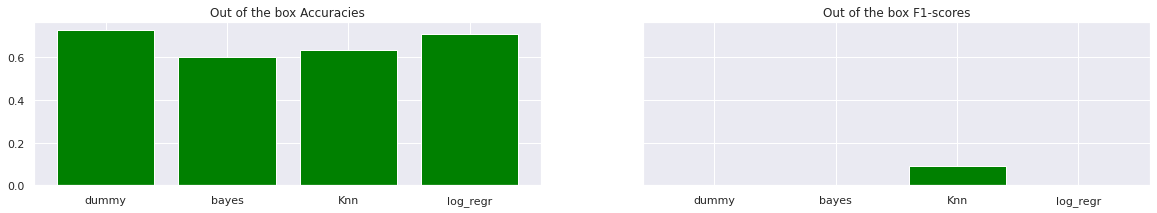

In [ ]:
plt.title(f"{max_average['name'].replace('-', '->')}, GridSearch ")
plt.bar(['accuracy', 'f1'], [max_average['accuracy'], max_average['f1']])
print("accuracy:", max_average['accuracy'])
print("f1-score:", max_average['f1'])
plot_scores(out_of_the_box_accuracy, out_of_the_box_f1, fig_index=102+c, title_prefix="Out of the box", color="green")

###### Παρατηρήσεις

* Παρατηρώ ότι το accuracy score δεν ξεπερνά και πάλι το out-of-the-box μοντέλο.
* Το f1-score έχει αυξηθεί σημαντικά, πλησιάζοντας το accuracy-score.

###### Πίνακας σύγχυσης

scaler-sampler-pca-knn:


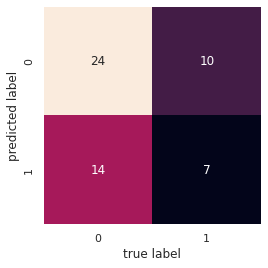

In [ ]:
pred = max_average['predictions']
print(f"{max_average['name']}:")
mat = confusion_matrix(test_labels_grid , pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

## ΜΕΡΟΣ 2

### Dataset: K05 - Εισαγωγή και επισκόπηση

#### Σύντομη Παρουσίαση

* Το dataset είναι βασισμένο σε μία εφαρμογή εύρεσης ταξί , της οποίας στόχος είναι το βέλτιστο matching ταξί και πελάτη βάσει διάφορων παραγόντων.
* Ο στόχος είναι η ταξινόμηση σε έναν από τους 3 τύπους στη στήλη που ονομάζεται SurgePricingType. 
* Η ταξινόμηση είναι ένα `Multi-classification` πρόβλημα.
* Στα δεδομένα συμπεριλαμβάνονται η απόσταση του ταξιδιού, στοιχεία για το ταξί ,τον προορισμό καθώς και διάφοροι δείκτες για τον πελάτη.
* Δουλεύουμε με το αρχείο `sigma_cabs.csv`.

#### Ανέβασμα dataset



In [ ]:
from google.colab import files
uploaded_files = files.upload()

Saving sigma_cabs.csv to sigma_cabs.csv


#### Διάβασμα dataset

In [ ]:
import pandas as pd

data = pd.read_csv("/content/sigma_cabs.csv",header=0)

examples_num = len(data.iloc[:,0])
features_num = len(data.iloc[0,:13])

print(f"Dataset",f"\nSamples: {examples_num}", f"\nFeatures: {features_num}", "\n")
print("Shape:", data.shape)

Dataset 
Samples: 131662 
Features: 13 

Shape: (131662, 14)


#### Προεπεξεργασία

##### Αντικάτασταση τιμών

Παρατηρούμε πως έχουμε 5 κατηγορικές μεταβλητές και πως οι υπόλοιπες είναι αριθμητικές.

In [ ]:
cats = []
nums = []
for i in range(len(data.columns)-1):
  c = data.columns[i]
  if data[c].dtypes == 'object':
    print(f"{c} with index {i} is categorical")
    cats.append(i)
  else:
    print(f"{c} with index {i} is numerical")
    nums.append(i)

Trip_ID with index 0 is categorical
Trip_Distance with index 1 is numerical
Type_of_Cab with index 2 is categorical
Customer_Since_Months with index 3 is numerical
Life_Style_Index with index 4 is numerical
Confidence_Life_Style_Index with index 5 is categorical
Destination_Type with index 6 is categorical
Customer_Rating with index 7 is numerical
Cancellation_Last_1Month with index 8 is numerical
Var1 with index 9 is numerical
Var2 with index 10 is numerical
Var3 with index 11 is numerical
Gender with index 12 is categorical


In [ ]:
print("Categorical columns indexes:", cats)
print("Numerical columns indexes:", nums)

Categorical columns indexes: [0, 2, 5, 6, 12]
Numerical columns indexes: [1, 3, 4, 7, 8, 9, 10, 11]


##### Προεπεξεργασία διαχείρισης απουσιάζουσων τιμών

In [ ]:
import numpy as np

data_grid = np.array(data)
none_val = np.sum(np.sum(data.isna()))
print("Number of empty values in train_set:", none_val)
print("Percentage of empty values in train_set:",f"{round(none_val/(features_num*examples_num)*100,3)}%")

Number of empty values in train_set: 137546
Percentage of empty values in train_set: 8.036%


Θα αντικαταστήσουμε τις τιμές με αριθμούς στις κατηγορικές μεταβλητές, και το 'NaN' με το np.NaN, ώστε να ορίσουμε μετά τους κατάλληλους imputers. 

In [ ]:
#to Dataframes
data_df = pd.DataFrame(data_grid)

#create mappings for features that represent categories in order to represent them with numbers
cab_mapping = {'A':0,'B':1,'C':2,'D':3,'E':4}
confidence_mapping={'A':0,'B':1,'C':2}
dest_mapping={'A':0,'B':1,'C':2,'D':3,'E':4,'F':5,'G':6,'H':7,'I':8,'J':9,'K':10,'L':11,'M':12,'N':13}
gender_mapping={'Male':0,'Female':1}
surge_mapping={1:0,2:1,3:2}

#attach columns to Dataframe
data_df.columns = list(data.columns)

#delete Trip_ID column as it is not needed
data_df = data_df.drop('Trip_ID',1)
cats.remove(0)
# all indexes on nums and cats lists should: -=1
nums = list(map(lambda x: x-1, nums))
cats = list(map(lambda x: x-1, cats))

#for training set
data_df['Type_of_Cab'] = data_df['Type_of_Cab'].map(cab_mapping)
data_df['Confidence_Life_Style_Index'] = data_df['Confidence_Life_Style_Index'].map(confidence_mapping)
data_df.Destination_Type = data_df.Destination_Type.map(dest_mapping)
data_df.Gender = data_df.Gender.map(gender_mapping)
data_df.Surge_Pricing_Type = data_df.Surge_Pricing_Type.map(surge_mapping)

#then, we are going to replace empty values in the categoric features with a specific value in order to 
#replace it later with the most frequent method in imputing
data_df.replace('NaN',np.NaN,inplace=True)

#finally, we get 
print(data_df)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  from ipykernel import kernelapp as app


       Trip_Distance  Type_of_Cab  ... Gender Surge_Pricing_Type
0               6.77          1.0  ...      1                  1
1              29.47          1.0  ...      0                  1
2              41.58          NaN  ...      0                  1
3              61.56          2.0  ...      0                  2
4              54.95          2.0  ...      0                  1
...              ...          ...  ...    ...                ...
131657         11.72          3.0  ...      0                  2
131658         74.81          2.0  ...      0                  1
131659         40.17          2.0  ...      1                  1
131660         46.88          1.0  ...      0                  1
131661         31.96          0.0  ...      0                  0

[131662 rows x 13 columns]


#### Αναλογία test και train sets

Θα θέσουμε την αναλογία train-test set σε 70-30 με την συναρτηση train_test_split του scikit.

In [ ]:
from sklearn.model_selection import train_test_split

labels =  data_df.iloc[:, [12]].values
features = data_df.iloc[:, :12].values
X_train, X_test, Y_train, Y_test = train_test_split(features, labels, test_size=0.3)

print("Train features shape:", X_train.shape)
print("Test features shape:", X_test.shape)
print("Train labels shape:", Y_train.shape)
print("Test labels shape:", Y_test.shape)


Train features shape: (92163, 12)
Test features shape: (39499, 12)
Train labels shape: (92163, 1)
Test labels shape: (39499, 1)


##### Εξάλειψη απουσιάζουσων τιμών

* Μελετώντας το dataset παρατηρούμε ότι οι απουσιάζουσες τιμές είναι σε συγκεκριμένες στήλες και όχι σε όλες.
* Ορίζουμε δύο ειδών imputers, ώστε να χειριστούμε αλλιώς τις απυσιάζουσες τιμές στις στήλες με κατηγορικά features, και αλλιώς στις στήλες με αριθμητικά features.
  * Κατηγορικά features: strategy = most_frequent
  * Αριθμητικά features: strategy = mean


In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

imp_numeric = Pipeline(
    steps = [
      ('imputer', SimpleImputer(strategy='mean')),
    ]
)
 
imp_categ = Pipeline(
    steps = [
      ('imputer', SimpleImputer(strategy='most_frequent')),
    ]
)
 
preprocessor = ColumnTransformer(
    transformers = [
      ('imputer_numeric', imp_numeric, nums),
      ('imputer_categoric', imp_categ, cats),
    ]
)

# fit transform on the training set
new_X_train_df = pd.DataFrame(preprocessor.fit_transform(pd.DataFrame(X_train)))
# ONLY transform on the testing set
new_X_test_df  = pd.DataFrame(preprocessor.transform(pd.DataFrame(X_test)))


Βλέπουμε ότι αντικαταστήσαμε όλες τις απουσιάζουσες τιμές , αφού πλέον δεν υπάρχουν.

In [ ]:
none_val = np.sum(np.sum(new_X_train_df).isna()) + np.sum(np.sum(new_X_test_df).isna())
print("Number of empty values in train and test set features:", none_val)

Number of empty values in train and test set features: 0


Τα **labels** βρίσκονται στην τελευταία στήλη (SurgePricingType) και όπως φαίνεται δεν έχουν απουσιάζουσες τιμές.



In [ ]:
print("Labels:", labels.ravel())

#Missing values in SurgePricingType
missing =  np.sum(np.sum(pd.DataFrame(labels).isna()))
print(f"\nNumber of missing values in labels: {missing}")


Labels: [1 1 1 ... 1 1 0]

Number of missing values in labels: 0


##### Από εδώ και πέρα δουλεύουμε με τα: new_X_train_df, new_X_test_df, Y_train, Y_test

In [ ]:
print("Transformed train shape:", new_X_train_df.shape)
print("Transformed test shape:", new_X_test_df.shape)
print("Train labels shape:", Y_train.shape)
print("Test labels shape:", Y_test.shape)

Transformed train shape: (92163, 12)
Transformed test shape: (39499, 12)
Train labels shape: (92163, 1)
Test labels shape: (39499, 1)


#### Μετράμε ότι τo dataset μας δεν είναι ισορροπημένο.


Types 	|Percentage 		|Total times
Type 0 	| 20.67% 		|27214
Type 1 	| 43.086% 		|56728
Type 2 	| 36.244% 		|47720


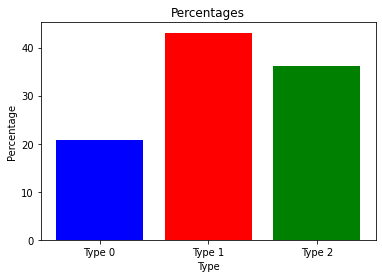

In [ ]:
import matplotlib.pyplot as plt
#Check if dataset is balanced
unique, counts = np.unique(labels, return_counts = True)
counts_dict = dict(zip(unique,counts))

types=dict()
print("\nTypes \t|Percentage \t\t|Total times")
for key in counts_dict.keys() :
  types[f"Type {key}"]= round(counts_dict[key]/len(labels)*100,3)
  print(f"Type {key} \t| {round(counts_dict[key]/len(labels)*100,3)}% \t\t|{counts_dict[key]}")

plt.figure(21)
plt.title("Percentages")
plt.xlabel("Type")
plt.ylabel("Percentage")
barlist = plt.bar(types.keys(), types.values(),color=['blue','red','green'])
plt.show()

#### Συμπεράσματα-Παρατηρήσεις

Παρατηρούμε τα εξής: 
* Το dataset μας αποτελείται απο 14 στήλες και έχουμε 131.662 examples.
* Η πρώτη στήλη είναι το ID του ταξιδιού, οπότε δεν έχει πρακτική σημασία και την αφαιρούμε.
* Η τελευταία στήλη είναι αυτή η οποία διαχωρίζει κάθε example σε μία απο τις 3 κατηγορίες.
* Καταγράφεται επίσης η απόσταση του ταξιδιού, η κατηγορία του ταξί, ο προορισμός(διαχωρισμένος σε 1 από 14 κατηγορίες).
* Έχουμε επικεφαλίδες.
* Υπάρχουν 137.546 απουσιάζουσες τιμές στο train set σε κάποια χαρακτηριστικά, τα οποία θα αφαιρέσουμε αργότερα, στο στάδιο της βελτιστοποίησης, για να δούμε την διαφορά που θα επιφέρει η βελτίωση αυτή στην επίδοση των ταξινομητών.
* Το dataset μας **δεν είναι ισορροπημένο** αφού βλέπουμε
ανόμοια κατανομή στις 3 κατηγορίες.

### Μετρικές


Το συγκεκριμένο πρόβλημα είναι multi-classification πρόβλημα ,γεγονός που πρέπει να λάβουμε υπόψιν κατά την επιλογή των μετρικών. Έτσι θα χρησιμοποιήσουμε:
1. Accuracy Score
2. F1 Score
3. Recall Score

### Cross-Validation και Train-Test Split

* **Train-Test Split**
> Το dataset μας το χωρίσαμε σε train και test sets με αναλογία είναι 70-30.

* **Cross-Validation**
> Θα χρησιμοποιήσουμε cross-validation και συγκεκριμένα το σχήμα k-folds CV με k=10. Στο k-folds το train-set μας χωρίζεται σε 10 μικρότερα μέρη. Θα την υλοποιήσουμε χρησιμοποιώντας την *cross_val_score* της *sklearn.model_selection* .

### Ταξινόμηση

#### Θα δουλέψουμε με 2 ταξινομητές:
* Mylti-Layer Perceptron (MLP), και
* Support Vector Machines (SVM)

#### Out of the box

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.dummy import DummyClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, recall_score

models = [
    {
      'name': 'dummy',
      'model': DummyClassifier(),
    },
    {
      'name': 'MLP',
      'model': MLPClassifier(),
    },
    {
      'name': 'SVM',
      'model': SVC(decision_function_shape='ovo')
    },
]

def compute_simple_scores(models, train, train_labels, test, test_labels):
    accuracy = dict()
    f1 = dict()
    recall = dict()
    for m in models:
      name, model = m.values()
      model.fit(train, train_labels.ravel())
      preds = model.predict(test)
      accuracy[name] = round(accuracy_score(test_labels, preds), 3)
      f1[name] = round(f1_score(test_labels, preds, average='macro'), 3)
      recall[name] = round(recall_score(test_labels, preds, average='macro'), 3)
    return accuracy, f1, recall


##### Fit σε ολόκληρο το train set και έλεγχος επίδοσης στο test set

In [ ]:
out_of_the_box_accuracy, out_of_the_box_f1, out_of_the_box_recall = compute_simple_scores(models, new_X_train_df, Y_train, new_X_test_df, Y_test)

print("Accuracy:", out_of_the_box_accuracy)
print("F1:", out_of_the_box_f1)
print("Recall:", out_of_the_box_recall)

Accuracy: {'dummy': 0.428, 'MLP': 0.684, 'SVM': 0.637}
F1: {'dummy': 0.2, 'MLP': 0.668, 'SVM': 0.606}
Recall: {'dummy': 0.333, 'MLP': 0.655, 'SVM': 0.588}


##### Πίνακας markdown

<table>
<thead>
  <td>Model</td>
  <td>Accuracy-score</td>
  <td>F1-score</td>
  <td>Recall-score</td>
</thead>
<tbody>
<tr>
  <td>Dummy</td>
  <td>0.428</td>
  <td>0.2</td>
  <td>0.333</td>
</tr>
<tr>
  <td>MLP</td>
  <td>0.684</td>
  <td>0.668</td>
  <td>0.655</td>
</tr>
<tr>
  <td>SVM</td>
  <td>0.637</td>
  <td>0.606</td>
  <td>0.588</td>
</tr>

</tbody>
</table>

##### Bar plots

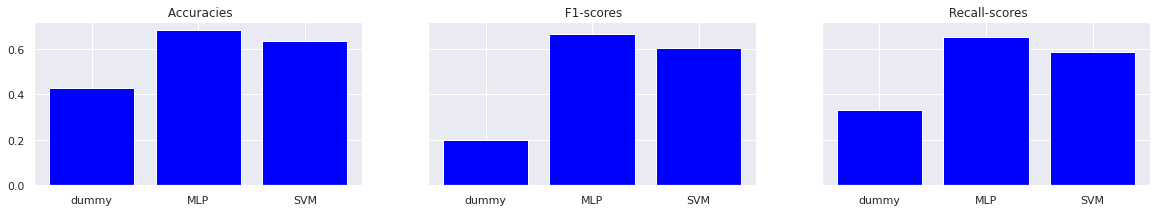

In [ ]:
# attach SVMs results
# out_of_the_box_accuracy['SVM']=0.64
# out_of_the_box_f1['SVM']=0.612
# out_of_the_box_recall['SVM']=0.594

def plot_scores(accuracy, f1, recall, fig_index=1, title_prefix="", color="blue"):
    fig, axs = plt.subplots(1, 3, figsize=(20, 3), sharey=True)
    
    axs[0].bar(accuracy.keys(), accuracy.values(), color=color)
    axs[0].set_title(f"{title_prefix} Accuracies")

    axs[1].bar(f1.keys(), f1.values(), color=color)
    axs[1].set_title(f"{title_prefix} F1-scores")

    axs[2].bar(recall.keys(), recall.values(), color=color)
    axs[2].set_title(f"{title_prefix} Recall-scores")

plot_scores(out_of_the_box_accuracy, out_of_the_box_f1, out_of_the_box_recall)

##### Παρατηρήσεις

* Και ο MLP classifier και τα SVMs παρουσιάζουν πολύ καλύτερες επιδόσεις από τον dummy classifier σε όλες τις μετρικές.
* Ο MLP classifier είναι ελαφρώς καλύτερος από τα SVMs σε όλες τις μετρικές.

#### Βελτιστοποίηση SVM

##### Με pipeline

* Χρησιμοποιούμε:
  * pipeline για να εισαγάγουμε την προεπεξεργασία
  * την βιβλιοθήκη optuna για την βελτιστοποίηση των υπερπαραμέτρων των μετασχηματιστών και των εκτιμητών
* Όσον αφορά τα εύρη που μελετάμε στις υπερπαραμέτρους:
  * PCA:
    * δεδομένου ότι έχουμε 12 features, δοκιμάζουμε να τα αναλύσουμε σε έως 10 
      components
  * SVM:
    * δοκιμάζουμε τις πιο συνήθεις επιλογές για τις υπερπαραμέτρους kernel, c, 
      gamma και degree

In [ ]:
# will be used to store the scores of the best models
best_accuracies = dict()
best_f1s = dict()
best_recalls = dict()

In [ ]:
import optuna
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import f1_score

predictions = []

def objective_svm(trial):
    
    steps = []
    
    scaler = StandardScaler()
    steps.append(('scaler', scaler))

    #ros = RandomOverSampler()
    #steps.append(('ros', ros))
    
    n_components = trial.suggest_int('n_components', 2, 10, step=4)
    pca = PCA(n_components=n_components)
    steps.append(('pca', pca))
    
    kernel=trial.suggest_categorical('kernel',['rbf','poly','linear','sigmoid'])
    c=trial.suggest_float("C",0.1,3.0,log=True)
    gamma=trial.suggest_categorical('gamma',['auto','scale'])
    degree=trial.suggest_int("degree",1,3,log=True)
    
    svm = SVC(decision_function_shape='ovo',degree=degree,gamma=gamma,C=c,kernel=kernel)
    steps.append(('svm', svm))
    
    pipe = Pipeline(steps=steps)
    
    pipe.fit(new_X_train_df, Y_train.ravel())
  
    preds = pipe.predict(new_X_test_df)

    predictions.append({
        'n_components': n_components,
        'kernel':kernel,
        'gamma':gamma,
        'C':c,
        'degree':degree,
        'preds': preds
    })
    
    score = f1_score(Y_test, preds, average='macro')
    
    return score


study = optuna.create_study(direction='maximize')
study.optimize(objective_svm, n_trials=4)

[I 2021-12-02 21:02:27,591] A new study created in memory with name: no-name-d0466d31-2fea-4340-aec8-00aa4617a03e
[I 2021-12-02 21:12:36,361] Trial 0 finished with value: 0.4310638160275016 and parameters: {'n_components': 10, 'kernel': 'poly', 'C': 1.204552851257661, 'gamma': 'scale', 'degree': 2}. Best is trial 0 with value: 0.4310638160275016.
[I 2021-12-02 21:24:40,814] Trial 1 finished with value: 0.6600886858013236 and parameters: {'n_components': 10, 'kernel': 'rbf', 'C': 0.20796091832380836, 'gamma': 'scale', 'degree': 1}. Best is trial 1 with value: 0.6600886858013236.
[I 2021-12-02 21:32:22,065] Trial 2 finished with value: 0.5508205656652657 and parameters: {'n_components': 6, 'kernel': 'linear', 'C': 0.5103197999781499, 'gamma': 'scale', 'degree': 1}. Best is trial 1 with value: 0.6600886858013236.
[I 2021-12-02 21:44:35,113] Trial 3 finished with value: 0.5625411524902337 and parameters: {'n_components': 6, 'kernel': 'rbf', 'C': 0.32060168355070784, 'gamma': 'auto', 'degre

Τελικά οι καλυτέροι υπερπαράμετροι για την ταξινόμηση με SVM είναι:

In [ ]:
study.best_params

{'C': 0.20796091832380836,
 'degree': 1,
 'gamma': 'scale',
 'kernel': 'rbf',
 'n_components': 10}

Στα παρακάτω διαγράμματα βλέπουμε ένα διάγραμμα για κάθε υπερπαράμετρο που δοκιμάστηκε , και με πιο σκούρο χρώμα τις υπερπαραμέτρους που οδήγησαν στη βέλτιστη επίδοση.

In [ ]:
optuna.visualization.plot_slice(study)

Εδώ βλέπουμε το διάγραμμα που συνδυάζει τις τιμές των υπερπαραμέτρων και την τιμή για το f1_score. Με το πιο σκούρο χρώμα φαίνεται η ευθεία που αντιστοιχεί στη βέλτιστη τιμή του f1.

In [ ]:
optuna.visualization.plot_parallel_coordinate(study)

###### Επιδόσεις καλύτερου μοντέλου SVM στο test set

###### Εντοπίζω τις επιδόσεις

* Χρησιμοποιούμε το dictionary `study.best_params` για να εντοπίσουμε τις προβλέψεις του καλύτερου μοντέλου SVM από το σύνολο των προβλέψεων `predictions` και να το αξιολογήσουμε στο test set, αυτή τη φορά υπολογίζοντας όλες τις μετρικές.

In [ ]:
# pretty print with sep='\n'
for pred in predictions:
  print(pred)

{'n_components': 10, 'kernel': 'poly', 'gamma': 'scale', 'C': 1.204552851257661, 'degree': 2, 'preds': array([2, 1, 2, ..., 1, 1, 1])}
{'n_components': 10, 'kernel': 'rbf', 'gamma': 'scale', 'C': 0.20796091832380836, 'degree': 1, 'preds': array([2, 1, 0, ..., 1, 1, 1])}
{'n_components': 6, 'kernel': 'linear', 'gamma': 'scale', 'C': 0.5103197999781499, 'degree': 1, 'preds': array([2, 2, 0, ..., 1, 2, 1])}
{'n_components': 6, 'kernel': 'rbf', 'gamma': 'auto', 'C': 0.32060168355070784, 'degree': 1, 'preds': array([2, 2, 0, ..., 1, 2, 1])}


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score

best_predictions = None
best_n_components = study.best_params['n_components']
best_C = study.best_params['C']
best_degree = study.best_params['degree']
best_gamma = study.best_params['gamma']
best_kernel = study.best_params['kernel']

for pred_object in predictions:
  if pred_object['n_components']==best_n_components and pred_object['gamma']==best_gamma and pred_object['C']==best_C and pred_object['kernel'] == best_kernel and pred_object['degree']==best_degree:
    best_predictions = pred_object['preds']
    break

best_accuracies['SVM_pipe'] = round(accuracy_score(Y_test, best_predictions), 3)
best_f1s['SVM_pipe'] = round(f1_score(Y_test, best_predictions, average='macro'), 3)
best_recalls['SVM_pipe'] = round(recall_score(Y_test, best_predictions, average='macro'), 3) 

print('SVM with pipe best scores:')
print("Accuracy:", best_accuracies['SVM_pipe'])
print("F1:", best_f1s['SVM_pipe'])
print("Recall:", best_recalls['SVM_pipe'])



SVM with pipe best scores:
Accuracy: 0.679
F1: 0.66
Recall: 0.645


###### Σχεδιάζω τον πίνακα σύγχυσης

SVM:


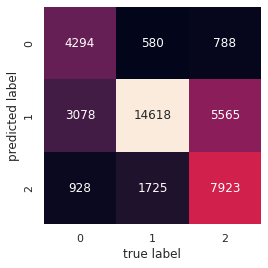

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns; sns.set()
print(f"SVM:")
mat = confusion_matrix(Y_test , best_predictions)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

##### Με αναζήτηση πλέγματος με διασταυρούμενη επικύρωση

###### Δοκιμάσαμε με μεγάλο αριθμό από trials (10), αλλά η διαδικασία αργούσε υπερβολικά (10 ώρες χωρίς να έχει τερματίσει), με την παρακάτω έξοδο:

In [ ]:
import optuna
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
    
param_distributions = {
  "kernel":optuna.distributions.CategoricalDistribution(['rbf','poly','linear','sigmoid']),
  "C":optuna.distributions.LogUniformDistribution(0.1,3),
  "gamma":optuna.distributions.CategoricalDistribution(['auto','scale']),
  "degree":optuna.distributions.LogUniformDistribution(1,3)
}

svm = SVC()
optuna_search = optuna.integration.OptunaSearchCV(svm, param_distributions, cv=10, n_trials = 10, n_jobs = -1, refit=True)
optuna_search.fit(new_X_train_df, Y_train.ravel())
preds_cv = optuna_search.predict(new_X_test_df)

/tmp/ipykernel_19269/2695495994.py:18: ExperimentalWarning: OptunaSearchCV is experimental (supported from v0.17.0). The interface can change in the future.
  optuna_search = optuna.integration.OptunaSearchCV(svm, param_distributions, cv=10, n_trials = 10, n_jobs = -1, refit=True)
[I 2021-12-03 19:46:05,741] A new study created in memory with name: no-name-26f010a7-9f19-4548-89e6-e49cd21034c3
/home/andreas/neural/lib/python3.9/site-packages/optuna/study/study.py:393: FutureWarning: `n_jobs` argument has been deprecated in v2.7.0. This feature will be removed in v4.0.0. See https://github.com/optuna/optuna/releases/tag/v2.7.0.
  warnings.warn(
[I 2021-12-03 20:11:10,025] Trial 1 finished with value: 0.4310732079649018 and parameters: {'kernel': 'sigmoid', 'C': 0.520455325772685, 'gamma': 'auto', 'degree': 1.5540801174820085}. Best is trial 1 with value: 0.4310732079649018.
[I 2021-12-03 20:11:51,207] Trial 8 finished with value: 0.4310732079649018 and parameters: {'kernel': 'sigmoid', '

###### Οπότε, στη συνέχεια δοκιμάσαμε με μικρότερο αριθμό από trials (4):

In [ ]:
import optuna
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
    
param_distributions = {
  "kernel":optuna.distributions.CategoricalDistribution(['rbf','poly','linear','sigmoid']),
  "C":optuna.distributions.LogUniformDistribution(0.1,3),
  "gamma":optuna.distributions.CategoricalDistribution(['auto','scale']),
  "degree":optuna.distributions.LogUniformDistribution(1,3)
}

svm = SVC()
optuna_search = optuna.integration.OptunaSearchCV(svm, param_distributions, cv=10, n_trials = 4, refit=True)
optuna_search.fit(new_X_train_df, Y_train.ravel())
preds_cv = optuna_search.predict(new_X_test_df)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: ExperimentalWarning:

OptunaSearchCV is experimental (supported from v0.17.0). The interface can change in the future.

[I 2021-12-02 22:25:14,232] A new study created in memory with name: no-name-85d872f1-3b9b-4ee6-8f83-d3f8639647bf
[I 2021-12-02 23:47:38,162] Trial 0 finished with value: 0.4099364707556538 and parameters: {'kernel': 'sigmoid', 'C': 1.6612257445958554, 'gamma': 'scale', 'degree': 1.2032199776299406}. Best is trial 0 with value: 0.4099364707556538.
[I 2021-12-03 01:12:25,940] Trial 1 finished with value: 0.4099364719329017 and parameters: {'kernel': 'sigmoid', 'C': 2.2782807397614846, 'gamma': 'scale', 'degree': 1.0968076766273904}. Best is trial 1 with value: 0.4099364719329017.


Τελικά οι καλυτέροι υπερπαράμετροι για την ταξινόμηση με SVM, με cross_validation είναι αυτές του trial 9:

In [ ]:
optuna_search.study_.best_params

In [ ]:
best_params_ = {
    'kernel': 'sigmoid',
    'C': 2.2782807397614846,
    'gamma': 'scale',
    'degree': 1.0968076766273904
}

Στα παρακάτω διαγράμματα βλέπουμε ένα διάγραμμα για κάθε υπερπαράμετρο που δοκιμάστηκε , και με πιο σκούρο χρώμα τις υπερπαραμέτρους που οδήγησαν στη βέλτιστη επίδοση.

In [ ]:
optuna.visualization.plot_slice(optuna_search.study_)

Εδώ βλέπουμε το διάγραμμα που συνδυάζει τις τιμές των υπερπαραμέτρων και την τιμή για το f1_score. Με το πιο σκούρο χρώμα φαίνεται η ευθεία που αντιστοιχεί στη βέλτιστη τιμή του f1.

In [ ]:
optuna.visualization.plot_parallel_coordinate(optuna_search.study_)

###### Επιδόσεις καλύτερου μοντέλου SVM στο test set

* Εντοπίζω τις επιδόσεις

In [ ]:
best_accuracies['SVM_cv'] = round(accuracy_score(Y_test, preds_cv), 3)
best_f1s['SVM_cv'] = round(f1_score(Y_test, preds_cv, average='macro'), 3)
best_recalls['SVM_cv'] = round(recall_score(Y_test, preds_cv, average='macro'), 3) 

print('SVM with cross validation best scores:')
print("Accuracy:", best_accuracies['SVM_cv'])
print("F1:", best_f1s['SVM_cv'])
print("Recall:", best_recalls['SVM_cv'])

* Σχεδιάζω τον πίνακα σύγχυσης

SVM:


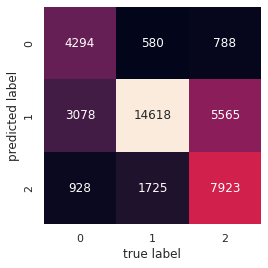

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns; sns.set()
print(f"SVM:")
mat = confusion_matrix(Y_test , best_predictions)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

#### Συμπεράσματα SVM

Γενικά, παρατηρήσαμε πως η ταξίνομηση με τα Support Vector Machines ή SVMs όπως λέγονται μπόρει να είναι μια επίπονη διαδικασία σε μεγάλα datasets όπως αυτό που εργαζόμαστε , με την βελτιστοποίηση να διαρκεί κάποιες ώρες (ανάλογα και τον αριθμό n_trials που χρησιμοποιούμε στην Optuna).

##### Σύγκριση out-of-the-box με pipelines

Βλέπουμε πως η βελτιστοποίηση λειτούργησε και η υλοποίηση με pipelines μας δίνει ελαφρώς καλύτερα αποτελέσματα από την οut of the box υλοποίηση που είχαμε:




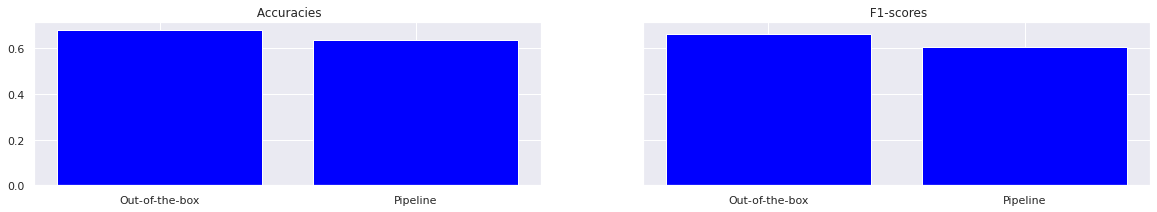

In [ ]:
plot_scores(accuracies, f1_scores, recalls)

##### Σύγκριση out-of-the-box με cross_validation



Για το cross validation χρησιμοποίησαμε τη συνάρτηση OptunaSearchCV όπου παρατηρήσαμε και πάλι αργούς χρόνους για τα αποτελέσματα, γι'αυτό και ο χαμηλός αριθμός στo attribute n_trials.

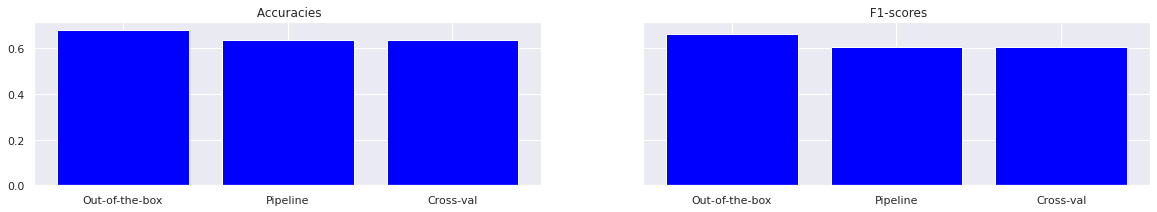

In [ ]:
plot_scores(accuracies, f1_scores, recalls)

#### Βελτιστοποίηση MLP

##### Με pipeline

* Χρησιμοποιούμε:
  * pipeline για να εισαγάγουμε την προεπεξεργασία
  * την βιβλιοθήκη optuna για την βελτιστοποίηση των υπερπαραμέτρων των μετασχηματιστών και των εκτιμητών
* Δοκιμάσαμε διάφορες αρχιτεκτονικές, χρησιμοποιώντας κάθε φορά διαφορετικό συνδυασμό μετασχηματιστών, και καταλήξαμε στην αρχιτεκτονική που φαίνεται στο παρακάτω κελί.
* Ομοίως με προηγουμένως, δοκιμάζουμε διάφορες τιμές για τις υπερπαραμέτρους
* Εδώ, όσον αφορά τις υπερπαραμέτρους του MLP, δοκιμάζουμε έως 2 hidden layers, και αριθμό units έως 150 στο κάθε στρώμα, ώστε το δίκτυο να μην γίνει υπερβολικά σύνθετο και καταλήξουμε σε overfitting.

In [ ]:
import optuna
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score

# we keep all the predictions in a list, to restore the predictions of the best model later and count all of its metrics
predictions = []

def objective_mlp(trial):
    
    steps = []
    
    scaler = StandardScaler()
    steps.append(('scaler', scaler))

    #ros = RandomOverSampler()
    #steps.append(('ros', ros))
    
    
    n_components = trial.suggest_int('n_components', 2, 10, step=4)
    pca = PCA(n_components=n_components)
    steps.append(('pca', pca))
    
    n_layers = trial.suggest_int('n_layers', 1, 3, step=1)
    layers = []
    for i in range(n_layers):
        layers.append(trial.suggest_int(f"n_units_{i}", 10, 150, step=10))
    
    mlp = MLPClassifier(hidden_layer_sizes=tuple(layers))
    steps.append(('mlp', mlp))
    
    pipe = Pipeline(steps=steps)
    
    pipe.fit(new_X_train_df, Y_train.ravel())
    
    
    preds = pipe.predict(new_X_test_df)
    
    predictions.append({
        'n_components': n_components,
        'hidden_layer_sizes': tuple(layers),
        'preds': preds
    })

    score = f1_score(Y_test, preds, average='macro')
    
    return score


study = optuna.create_study(direction='maximize')
study.optimize(objective_mlp, n_trials=10)



[I 2021-12-02 19:05:40,192] A new study created in memory with name: no-name-91505291-ecbf-4df6-a5e1-9107cec7f390
[I 2021-12-02 19:05:51,118] Trial 0 finished with value: 0.2940945758327918 and parameters: {'n_components': 2, 'n_layers': 1, 'n_units_0': 100}. Best is trial 0 with value: 0.2940945758327918.
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

[I 2021-12-02 19:09:16,323] Trial 1 finished with value: 0.6670789336792677 and parameters: {'n_components': 10, 'n_layers': 2, 'n_units_0': 70, 'n_units_1': 60}. Best is trial 1 with value: 0.6670789336792677.
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

[I 2021-12-02 19:13:31,592] Trial 2 finished with value

Τελικά οι καλυτέροι υπερπαράμετροι για την ταξινόμηση με MLP είναι:

In [ ]:
study.best_params

{'n_components': 10,
 'n_layers': 3,
 'n_units_0': 50,
 'n_units_1': 20,
 'n_units_2': 20}

Στα παρακάτω διαγράμματα βλέπουμε ένα διάγραμμα για κάθε υπερπαράμετρο που δοκιμάστηκε , και με πιο σκούρο χρώμα τις υπερπαραμέτρους που οδήγησαν στη βέλτιστη επίδοση.

In [ ]:
optuna.visualization.plot_slice(study)

Εδώ βλέπουμε το διάγραμμα που συνδυάζει τις τιμές των υπερπαραμέτρων και την τιμή για το f1_score. Με το πιο σκούρο χρώμα φαίνεται η ευθεία που αντιστοιχεί στη βέλτιστη τιμή του f1.

In [ ]:
optuna.visualization.plot_parallel_coordinate(study)

###### Επιδόσεις καλύτερου μοντέλου MLP στο test set

###### Εντοπίζω τις επιδόσεις

* Χρησιμοποιούμε το dictionary `study.best_params` για να εντοπίσουμε τις προβλέψεις του καλύτερου μοντέλου SVM από το σύνολο των προβλέψεων `predictions` και να το αξιολογήσουμε στο test set, αυτή τη φορά υπολογίζοντας όλες τις μετρικές.

In [ ]:
# pretty print with sep='\n'
for pred in predictions:
  print(pred)

{'n_components': 2, 'hidden_layer_sizes': (100,), 'preds': array([1, 1, 2, ..., 1, 2, 1])}
{'n_components': 10, 'hidden_layer_sizes': (70, 60), 'preds': array([2, 1, 0, ..., 1, 2, 1])}
{'n_components': 6, 'hidden_layer_sizes': (70, 70), 'preds': array([2, 2, 0, ..., 1, 1, 1])}
{'n_components': 10, 'hidden_layer_sizes': (60, 130), 'preds': array([2, 1, 0, ..., 1, 1, 1])}
{'n_components': 2, 'hidden_layer_sizes': (10, 70, 140), 'preds': array([1, 1, 2, ..., 1, 2, 1])}
{'n_components': 10, 'hidden_layer_sizes': (50, 10, 120), 'preds': array([2, 1, 0, ..., 1, 1, 1])}
{'n_components': 6, 'hidden_layer_sizes': (60,), 'preds': array([2, 2, 0, ..., 1, 2, 1])}
{'n_components': 6, 'hidden_layer_sizes': (100, 50), 'preds': array([2, 2, 0, ..., 1, 2, 1])}
{'n_components': 10, 'hidden_layer_sizes': (50, 20, 20), 'preds': array([2, 1, 0, ..., 1, 1, 1])}
{'n_components': 6, 'hidden_layer_sizes': (90, 140, 30), 'preds': array([2, 2, 0, ..., 1, 2, 1])}


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score

best_predictions = None
best_n_components = study.best_params['n_components']

best_units_tuple = None
best_n_units_0 = study.best_params['n_units_0']
best_n_units_1 = study.best_params.get('n_units_1')
best_n_units_2 = study.best_params.get('n_units_2')
if best_n_units_1:
  if best_n_units_2:
    best_units_tuple = (best_n_units_0, best_n_units_1, best_n_units_2)
  else:
     best_units_tuple = (best_n_units_0, best_n_units_1)
else:
     best_units_tuple = (best_n_units_0)

for pred_object in predictions:
  if pred_object['n_components']==best_n_components and pred_object['hidden_layer_sizes']==best_units_tuple:
    best_predictions = pred_object['preds']
    break

best_accuracies['MLP'] = round(accuracy_score(Y_test, best_predictions), 3)
best_f1s['MLP'] = round(f1_score(Y_test, best_predictions, average='macro'), 3)
best_recalls['MLP'] = round(recall_score(Y_test, best_predictions, average='macro'), 3) 

print('MLP best scores:')
print("Accuracy:", best_accuracies['MLP'])
print("F1:", best_f1s['MLP'])
print("Recall:", best_recalls['MLP'])



MLP best scores:
Accuracy: 0.683
F1: 0.668
Recall: 0.651


###### Σχεδιάζω τον πίνακα σύγχυσης

MLP:


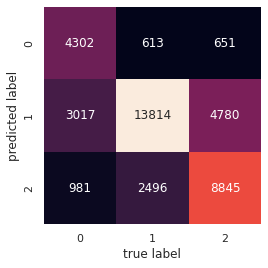

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns; sns.set()
print(f"MLP:")
mat = confusion_matrix(Y_test , best_predictions)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

##### Με αναζήτηση πλέγματος με διασταυρούμενη επικύρωση

**Παρατήρηση:** Eπειδή παρατηρήσαμε μεγάλους χρόνους εκτέλεσης επιλέξαμε συγκεκριμένους συνδυασμούς για την εξερεύνηση της παραμέτρου *hidden_layer_sizes* - οι οποίοι ανήκουν στους βέλτιστους συνδυασμούς για το ερώτημα με τα pipelines.

In [ ]:
import optuna
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPClassifier

#using best combinations found in pipeline optimisation
layers = [(70, 60),(70, 70),(10,70,140),(50, 10, 120),(50, 20, 20),(90, 140, 30)]

param_distributions = {
  "hidden_layer_sizes":optuna.distributions.CategoricalDistribution(layers)
}

mlp = MLPClassifier()
optuna_search = optuna.integration.OptunaSearchCV(mlp, param_distributions, cv=10, n_trials = 4, refit=True)
optuna_search.fit(new_X_train_df, Y_train.ravel())
preds_mlp_cv = optuna_search.predict(new_X_test_df)

/usr/local/lib/python3.7/dist-packages/optuna/distributions.py:427: UserWarning:

Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (70, 60) which is of type tuple.

/usr/local/lib/python3.7/dist-packages/optuna/distributions.py:427: UserWarning:

Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (70, 70) which is of type tuple.

/usr/local/lib/python3.7/dist-packages/optuna/distributions.py:427: UserWarning:

Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (10, 70, 140) which is of type tuple.

/usr/local/lib/python3.7/dist-packages/optuna/distributions.py:427: UserWarning:

Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 10, 120) which is of type tuple.

/usr/local/lib/pyt

Τελικά οι καλυτέροι υπερπαράμετροι για την ταξινόμηση με MLP με cross_validation είναι:

In [ ]:
optuna_search.study_.best_params

NameError: ignored

Στα παρακάτω διαγράμματα βλέπουμε ένα διάγραμμα για κάθε υπερπαράμετρο που δοκιμάστηκε , και με πιο σκούρο χρώμα τις υπερπαραμέτρους που οδήγησαν στη βέλτιστη επίδοση.

In [ ]:
optuna.visualization.plot_slice(optuna_search.study_)

Εδώ βλέπουμε το διάγραμμα που συνδυάζει τις τιμές των υπερπαραμέτρων και την τιμή για το f1_score. Με το πιο σκούρο χρώμα φαίνεται η ευθεία που αντιστοιχεί στη βέλτιστη τιμή του f1.

In [ ]:
optuna.visualization.plot_parallel_coordinate(optuna_search.study_)

###### Επιδόσεις καλύτερου μοντέλου SVM στο test set

###### Εντοπίζω τις επιδόσεις

In [ ]:
best_accuracies['MLP_cv'] = round(accuracy_score(Y_test, preds_cv), 3)
best_f1s['MLP_cv'] = round(f1_score(Y_test, preds_cv, average='macro'), 3)
best_recalls['MLP_cv'] = round(recall_score(Y_test, preds_cv, average='macro'), 3) 

print('SVM with cross validation best scores:')
print("Accuracy:", best_accuracies['MLP_cv'])
print("F1:", best_f1s['MLP_cv'])
print("Recall:", best_recalls['MLP_cv'])

###### Σχεδιάζω τον πίνακα σύγχυσης

SVM:


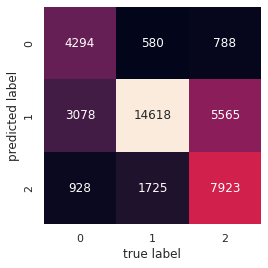

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns; sns.set()
print(f"SVM:")
mat = confusion_matrix(Y_test , preds_mlp_cv)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

#### Συμπεράσματα MLP

##### Με pipeline

###### Σχεδιάζουμε τις συγκριτικές γραφικές για τις μελέτες με το optuna

Out of the box:


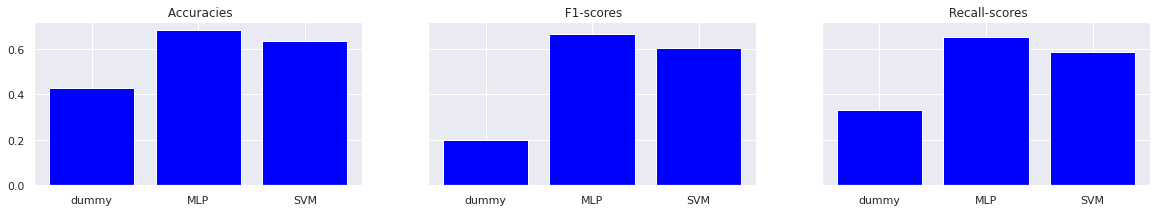

In [ ]:
print("Out of the box:")
plot_scores(out_of_the_box_accuracy, out_of_the_box_f1, out_of_the_box_recall)

In [ ]:
print("Accuracies:",best_accuracies)
print("F1 scores",best_f1s)
print("Recall scores",best_recalls)

Accuracies: {'SVM_pipe': 0.679, 'MLP': 0.683}
F1 scores {'SVM_pipe': 0.66, 'MLP': 0.668}
Recall scores {'SVM_pipe': 0.645, 'MLP': 0.651}


After:


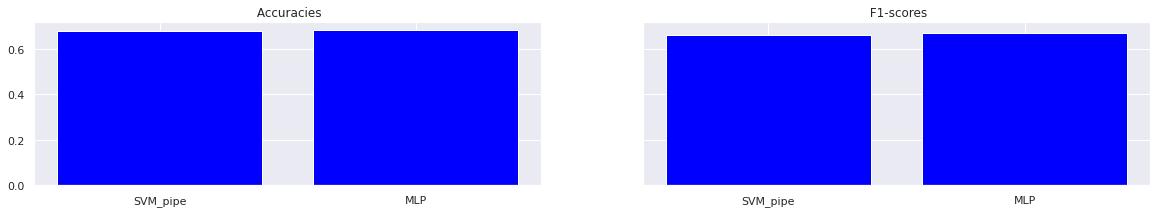

In [ ]:
print("After:")
plot_scores(best_accuracies, best_f1s, best_recalls)

### Βέλτιστος ταξινομητής

Γενικά παρατηρούμε πως ο MLP παρουσιάζει καλύτερες επίδοσεις από τα SVMs με μικρές όμως διαφορές.